##### MATH5271 Environmental Data Science and Statistics



## Week 5: Principal Component Analysis

##### Welcome to Week 5 of MATH5271. In this session we will explore Principal Component Analysis. By the end of this session you should understand:

- Basic aspects of multi-variable data;
- How to represent multivariable data with an ordered set of Principal Components;
- The concepts of supervised and unsupervised statistical learning;
- Various applications of PC/EOF approaches in Environemntal Data Sciences.


## 1. Setup and Load Data

Before we get started analysing some data we need to ensure we have the appropriate 'libraries' installed. You can think of these as opening a box of available tools. The .csv files we upload will be uploaded into a 'pandas' data frame. We will use the 'numpy' (numerical python) packkage to do some basic maths with the data and Matplotlib's 'pyplot' package to make some pretty graphs. 

In this lab we will also use xarray which is an extremely powerful and user frieldly tool for analysis of large multi-dimensional data sets. Here is a more in depth [tutorial](http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/xarray.html) just on xarray that I have built the second half of this lab from.

There are many other packages and libraries avaialble freely in python. We will experiment with a few in this course but will only really scratch the surface. I will try to keep things as simple as possible so we can focus on understanding - rather than trouble shooting technical issues.

In [1]:
# import libraries
import pandas as pd
import xarray as xr

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook
%matplotlib inline

I have copied the data table 9.6 from Wilks into a csv file and am storing these on github.

We will load the data table as a pandas 'DataFrame'. This is a 2-dimensional data structure that can store data of different types and has inbuilt operations (like calcualting statistics and doing basic plots). 

In [2]:
# Define the URL where the data set is stored
TableA1_url = 'https://raw.githubusercontent.com/janzika/MATH5271/main/Wilks_TableA1.csv' 

# Import the data set as a Pandas Dataframe using the 'read_csv' function
df = pd.read_csv(TableA1_url)

## Multi-variate data analysis

Consider a data set ($X$), with $K$ anomaly variables (${\bf x }_{k}$) each with $n$ observations (for example over time; $x_{tk}$). That is  

$$X = \begin{bmatrix}\bf{x}_{1} & \bf{x}_{2} & ... & \bf{x}_{K}
\end{bmatrix}
=\begin{bmatrix}x_{11} & x_{12} & ... & x_{1k}& ... & x_{1K}\\
x_{21} & x_{22} & ... & x_{1k}& ... & x_{2K}\\
... & ... & ... & ... & ... & ...\\
x_{t1} & x_{t2} & ... & x_{tk}& ... & x_{tK}\\
... & ... & ... & ... & ... & ...\\
x_{n1} & x_{n2} & ... & x_{nk}& ... & x_{nK}
\end{bmatrix}\\
$$

For example, ${\bf x }_{k}$ could be meteorological observations of different variables (with their mean subtracted) and/or at different locations and t could distinguish the time in days, hours or second at which the observation were made. 

For example let $x_{t1}$ be the Ithaca and $x_{t2}$ Canandaigua minimum temperature on day $t$ (here $K$=2 and $n$=31).

Text(0, 0.5, 'Canandaigua min. temp. anomaly ($x_2$, $^{\\circ}$F)')

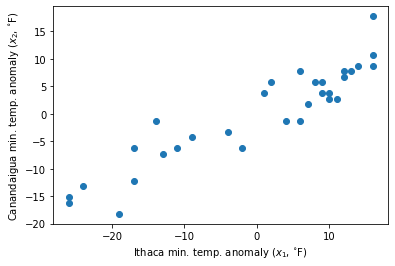

In [155]:
idf = df[df['Location'].isin(['Ithaca'])]
cdf = df[df['Location'].isin(['Canandaigua'])]
x1 = idf.MinTemp_Far-idf.MinTemp_Far.mean() ; 
x2 = cdf.MinTemp_Far.values-cdf.MinTemp_Far.mean()

plt.scatter(x1,x2)
plt.xlabel('Ithaca min. temp. anomaly ($x_1$, $^{\circ}$F)')
plt.ylabel('Canandaigua min. temp. anomaly ($x_2$, $^{\circ}$F)')

## Multi-variate normal (MVN) distrbution

Just as it is common to characterise 1D data sueing the normal distribution, a common way of chatracterising multivariate distribution is as a multivariate normal distribution. Consider the case for 2D data where the two variables are uncorrelated (i.e. the probability of one value being large/small has no bearing on the other). In this case the distirbution is proportional to product of the two 1D normal distributionsm such that

$$f(x_1,x_2) = f_N(x)*f_N(y) = \frac{1}{2\sigma_1\sigma_2\pi}\exp^{-\frac{1}{2}\left[\left(\frac{x_1}{\sigma_1}\right)^2 - \left(\frac{x_2}{\sigma_2}\right)^2\right]}\,$$

Where $\overline{x}$ is the mean in time and $\sigma$ is the standard deviation.

Text(0, 0.5, 'Canandaigua min. temp. ($x_2$, $^{\\circ}$F)')

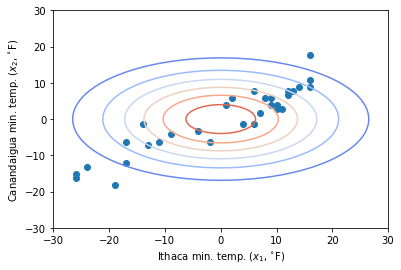

In [157]:
# Standard deviation of data
sig1 = x1.std(); sig2 = x2.std()
# Create mesh for 2D MVN
xx1 = np.linspace(-30, 30, 100)
xx2 = np.linspace(-30, 30, 100)
X1, X2 = np.meshgrid(xx1,xx2)
Z = np.exp(-0.5*(((X1)/sig1)**2 + ((X2)/sig2)**2))
# Plot
plt.contour(X1, X2, Z, cmap=cm.coolwarm)
plt.scatter(x1,x2)
plt.xlabel('Ithaca min. temp. ($x_1$, $^{\circ}$F)')
plt.ylabel('Canandaigua min. temp. ($x_2$, $^{\circ}$F)')

## Multi-variate normal (MVN) distrbution

The issue with the previous example is that the data is correlated, so a 3rd parameter is included to help capture the distribution more accurately: the covariance

$$ s_{xy} = \frac{1}{n-1}\sum_{t=1}^n \left[ (x_t - \overline{x})((y_t - \overline{y})\right].$$

Converting the covariance to a correlation via $\rho =  s_{12}/\sigma_x\sigma_y$ the MVN becomes

$$f_{MVN}(x_1,x_2) = 
\frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}}
\exp^{\frac{-1}{2(1-\rho^2)}
\left[
\left(\frac{x_1}{\sigma_1}\right)^2 
+ \left(\frac{x_2}{\sigma_2}\right)^2 
- 2\rho\left(\frac{x_1}{\sigma_1}\right)\left(\frac{x_2}{\sigma_2}\right) 
\right]}.$$

Text(0, 0.5, 'Canandaigua min. temp. anomaly ($x_2$, $^{\\circ}$F)')

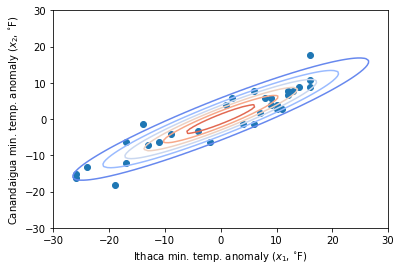

In [159]:
n=idf.shape[0]
COV = (1/(n-1))*np.sum((x1)*(x2))
rho = COV/(sig1*sig2)
Z = np.exp(-(1/(2*(1-rho**2)))*(((X1)/sig1)**2 + \
    ((X2)/sig2)**2 - \
    2*rho*((X1)/sig1)*((X2)/sig2)))
# Plot
plt.contour(X1, X2, Z, cmap=cm.coolwarm)
plt.scatter(x1,x2)
plt.xlabel('Ithaca min. temp. anomaly ($x_1$, $^{\circ}$F)')
plt.ylabel('Canandaigua min. temp. anomaly ($x_2$, $^{\circ}$F)')

## Data Compression Hypothetical:

It's the year 2030 and an unforseen crisis has severely limited digital data storage. You and Daniel Wilks would like to preserve both the Ithaca and Canandaigua temperature records but you only have enough disk space to store one time series. What do you do? 

You have enough disk space for an equation and few coefficient too if you need.

## Rotating the reference frame

Since $x_1$ and $x_2$ covary so much we can rotate the reference frame to form two new variable $u_1$, oriented along the doninant axis of variation. We are looking for 

$${\bf u}_1 = {\bf{x}}_{1}e_{11}+{\bf{x}}_2e_{21}$$

Such that $e_{11}^2+e_{21}^2=1$.

In [160]:
# Create 100 angles from 0 to pi
theta = np.arange(0,np.pi,np.pi/100) 
u_var = np.zeros_like(theta) # Pre allocate variances
#Loop through each of the angles and store the variance for each
for i in np.arange(0,theta.shape[0]):
  u1 = np.cos(theta[i])*(x1-x1bar)+np.sin(theta[i])*(x2-x2bar)
  u_var[i] = np.var(u1)
#Identify the maximum
maxvar = np.max(u_var)
theta_u1 = theta[np.where(u_var==maxvar)].squeeze()

e11= 0.8443279255020151 , e21= 0.5358267949789967


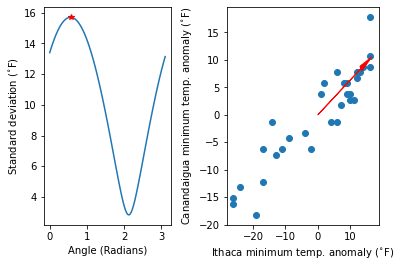

In [162]:
#Plot the varince as a function of angle and the max direction
plt.subplot(1,5,(1,2))
plt.plot(theta,np.sqrt(u_var)); plt.plot(theta_u1,np.sqrt(maxvar),'r*')
plt.xlabel('Angle (Radians)'); plt.ylabel('Standard deviation ($^{\circ}$F)')

plt.subplot(1,2,2)
plt.scatter(x1,x2)
plt.arrow(0,0,np.cos(theta_u1)*np.sqrt(maxvar),\
          np.sin(theta_u1)*np.sqrt(maxvar),\
          head_width=1,head_length=4, fc='r', ec='r')
plt.xlabel('Ithaca minimum temp. anomaly ($^{\circ}$F)')
plt.ylabel('Canandaigua minimum temp. anomaly ($^{\circ}$F)')
print('e11=',np.cos(theta_u1),', e21=',np.sin(theta_u1))

## Covariance Matrix

Instead of rotating through every possible angle, we can find the direction from the $covariance$ $matrix$

$$S = \begin{bmatrix}s_{11} & s_{12}\\
s_{21} & s_{22}
\end{bmatrix}.
$$

Where $s_{ij}$ is defined above. The 1st $eigenvector$ of $S$ satisfy

$${\bf e}_1 = [e_{11}, e_{12}]^T$$

and the first $eigenvalue$, $\lambda_1$ is the variance of that dominant component.

## Eigenvectors and Eigenvalues

If you never got the 'point' of eigenvectors and eigenvalues now is the time!

Recall that the eigenvalues ($\lambda$) of  the  matrix A satisfy
$$A = I\lambda  $$ 
where $I$ is the identity matrix and the eigenvectors ($\bf e$) satisfy
$$ A {\bf e} = \lambda {\bf e}.  $$


## Eigenvectors and Eigenvalues Example

Consider a MVN distribution with 

$$S = \begin{bmatrix}1 & 3/5\\
3/5 & 2
\end{bmatrix}.
$$

What are $\lambda$ and $\bf e$?

Our matrix, $S$ for Ithaca and Canandaigua, is empirical so we can't compute the eigenvectors easily by hand. Lets use numpy's linear algebra package instead.

In [163]:
# Compute the 2x2 covariance matrix
S = [[ (1/(n-1))*np.sum((x1)**2) , (1/(n-1))*np.sum((x1)*(x2)) ],\
     [ (1/(n-1))*np.sum((x1)*(x2)) , (1/(n-1))*np.sum((x2)**2)]] 
#Use numpy linalg.eig to determine eigenvalues and eigenvectors.
lam, E = np.linalg.eig(S)
print('std of max u1 =', np.sqrt(lam[0]))
print('e11 =',E[0][0],', e12 =',E[1][0])

std of max u1 = 15.961112964119252
e11 = 0.847859124540667 , e21 = 0.5302215621163795


## 1st Principal Component

$u_1$ is the 1st principal component. It represents the best compression of two time series the data into a single time series.

The 2nd principal component $u_2$ is prependicular to $u_1$ and has the smallest variance.

We can re-create the original time series using 

$${\bf x }_1 =  e_{11}{\bf{u}}_{1}+e_{12}{\bf{u}}_2$$

or, if only the 1st component is available

$${\bf{x}}_1 \approx  {\bf{u}}_{1}e_{11}.$$ 

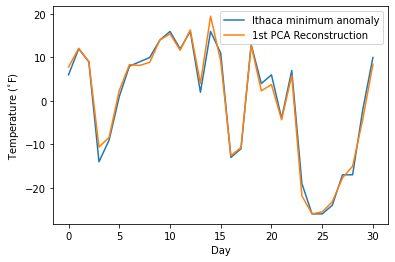

In [169]:
u1 = E[0][0]*x1+E[1][0]*x2
x1approx = E[0][0]*u1
plt.plot(x1,label='Ithaca minimum anomaly')
plt.plot(x1approx,label='1st PCA Reconstruction')
plt.ylabel('Temperature ($^{\circ}$F)')
plt.xlabel('Day');plt.legend()

## General Multivariate Normal Distribution (MVN)

For the general case of a data set, $X$, with $K$ variables the Covariance Matrix is 

$$S = \begin{bmatrix}s_{11} & s_{12} & ... & s_{1K}\\
s_{21} & s_{22} & ... & s_{2K}\\
... & ... & ... & ...\\
s_{K1} & s_{K2} & ... & s_{KK}
\end{bmatrix}.
$$

and the MVN is represented by

$$f_{MVN}({X}) = 
\frac{1}{(2\pi)^{K/2}\sqrt{det[S]}}
\exp{
\left[
\frac{-1}{2}{X}^T[S]^{-1}{X}
\right]}.
$$

Notice that if all the variables were independent ($s_{jk}=0$ for $j\neq k$) then $S$ would be diagonal and 
$$f_{MVN} = f(x_1)f(x_2)...f(x_K).$$

## Principal Components

In general any anomaly data set, $X$, can be represented as a set of principal components $u_m$ (1$\leq m \leq k$) with

$${\bf{u}}_m ={\bf e}_{m}^{T}{\bf x} = \sum_{k=1}^K e_{k,m}{x}_k$$

where ${\bf e}_{m}$ are the eaigenvectors of the covariance matrix $S$. 

Likewise the data can be reproduced with

$${\bf{x}}_k = \sum_{k=1}^K e_{k,m}{u}_m \approx \sum_{k=1}^M e_{k,m}{u}_m.$$





## Orthoginality

Much like in frequency domain analysis, we are projecting the data $\bf x$ into a set of orthoginal basis functions defined by $\bf e$.

How is frequency domain analysis otherwise different/similar to PCA?

## PCA vs Linear Regression

In week 2 we developed a linear regression based model for Canandaigua temperature based on the temperature at Ithaca.

Presented in terms of anomalies, our linear regression model is simply

$${\bf x}_2 = b {\bf x}_1 +{\bf \epsilon}$$

How does this differ from the excercise of reproducing ${\bf x}_2$ from the first principle component?

Which approach would have a smaller error?



## Supervised vs Unsupervised Learning

"For each observation of the predictor measurement(s) $x_i$, $i = 1,...,n$ there is an associated response measurement $y_i$. [In supervised learning] We wish to fit a model that relates the response to the predictors, with the aim of accurately predicting the response for future observations (prediction) or better understanding the relationship between the response and the predictors (inference)...

In contrast, unsupervised learning describes the somewhat more challenging situation in which for every observation $i = 1,...,n$, we observe a vector of measurements $x_i$ but no associated response $y_i$. It is not possible to fit a linear regression model, since there is no response variable to predict. In this setting, we are in some sense working blind; the situation is referred to as unsupervised because we lack a response variable that can supervise our analysis."

James, Witten, Hastie and Tibshirani (2017): An Introduction to Statistical Learning with Applications in R

Text(0, 0.5, 'Amplitude')

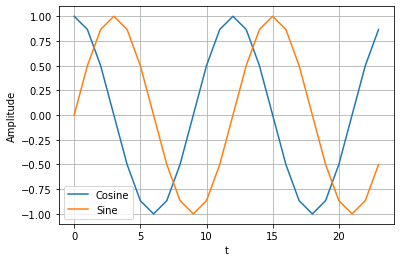

In [288]:
# Plot some cosine and sine functions
n = 24 #length of data set in months
t = np.arange(0,n) #time dimension
k = 2 #number of cycles (period = 12)
# Use numpy to define cosine and sine
cosfnc = np.cos(2*np.pi*t*k/n)
sinfnc = np.sin(2*np.pi*t*k/n)
plt.plot(cosfnc,label ='Cosine')
plt.plot(sinfnc,label ='Sine')
plt.grid(); plt.legend()
plt.xlabel('t');plt.ylabel('Amplitude')

If we want to fit just a single harmonic, then an obvious approach is linear regression where we find $A_k$ and $B_k$ such 

$$ y_t - \overline{y} = A_k \cos\left(\frac{2\pi t k}{n}\right) + B_k \sin\left(\frac{2\pi t k}{n}\right) + \epsilon_t $$

and the root mean square of the error term ($\sum \epsilon_t^2$) is minimised. 

In order to exploit powerful linear algebra methods we can cast the above problem into matrix form such that 

$$ X \bf{b} = \bf{y} - \bf{E} $$

where $X$ is a 2 x $n$ matrix containing the cosine and sine functions, $\bf{b} = [A_k,B_k]$. 

Let's try this and minimise the error using numpy's linear algebra, least squares function.



-23.739767027193725 -2.1638511734738537


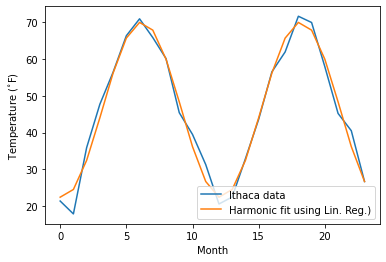

In [289]:
# Define A and y such that Ax = y
X = np.array([cosfnc,sinfnc]).transpose()
y = df.Temp_Far-df.Temp_Far.mean()
# Solve x = inv(A)*y
b_reg = np.linalg.lstsq(X, y,rcond=-1) #(rcond=1 supresses error msg.)
A2lr = b_reg[0][0]; B2lr = b_reg[0][1]; 
y_harmonic = df.Temp_Far.mean() + A2lr*cosfnc+B2lr*sinfnc
# Plot
plt.plot(t,df.Temp_Far,label ='Ithaca data')
plt.plot(t,y_harmonic,label ='Harmonic fit using Lin. Reg.)')
plt.ylabel('Temperature ($^{\circ}$F)'); plt.xlabel('Month'); plt.legend()
print(A2lr,B2lr)

### Summation formula

Linear regression is actually not necassary in this case. We can compute coefficients for any period ($k$ up to $n/2$) simply using the following summation formulae

$$ A_k = \frac{2}{n}\sum_{t=1}^{n}y_n\cos\left(\frac{2\pi t k}{n}\right)$$

and
$$ B_k = \frac{2}{n}\sum_{t=1}^{n}y_n\sin\left(\frac{2\pi t k}{n}\right).$$

Let's try this.


In [290]:
#Compute coefficients using summation formulae
A2 = (2/n)*np.sum(y*cosfnc)
B2 = (2/n)*np.sum(y*sinfnc)
#print and compare to least squares case (lr)
print(A2,B2)
print(A2lr,B2lr)

-23.739767027193714 -2.163851173473855
-23.739767027193725 -2.1638511734738537


### Why do the summation formulae work?

The trigonometric functions \{$\cos(\frac{2\pi t k}{n}),\sin(\frac{2\pi t k}{n})$\} form a complete orthoginal basis for the possible time series of length $n$. Integrating (summing) the basis functions multiplied by the data $y_t$ determines the projection of the data onto the basis functions.

The summation (integral) is called an 'inner product'. Taking the inner product of data with trig functions is equivalent to calculating the 'dot product' of a vector with basis vectors. E.g. for a vector in 3D ${\bf u} = [u,v,w]$ and basis vectors $\{{\bf i},{\bf j},{\bf k}\}$ we have

$$ {\bf u} \cdot {\bf i} = [u,0,0];\\
{\bf u} \cdot {\bf j} = [0,v,0]; \\
{\bf u} \cdot {\bf k} = [0,0,w].$$ 

We can think of the coefficients $A_k$ and $B_k$ as describing how much the data projects onto each harmonic.

# Fourier Transform

In general, we can represent any data with the set of harmonics from $k=1$ to $k=n/2$ such that

$$ y_t = \overline{y} + \sum^{n/2}_{k=1} \left[ A_k\cos(\frac{2\pi t k}{n}) +B_k\sin(\frac{2\pi t k}{n})\right].
$$

The maginute of the data at each frequency $f_k = k/n$ and period $\tau_k = n/k$ is given by 

$$ C_k = \left[ A_k^2+ B_k^2 \right]^{1/2}. $$

This projection of the data into the frequency domain is called the 'Fourier Transform'.

Let's write a function to calculate the coefficients for any period.

In [291]:
# Define function with data (y) and harmonic (k) as inputs, A and B as outputs
def fourtrans(y,k): # y = data, k = harmonic
  n = y.shape[0]
  A_k=(2/n)*np.sum(y.values*np.cos(2*np.pi*k*np.arange(0,n)/n))
  B_k=(2/n)*np.sum(y.values*np.sin(2*np.pi*k*np.arange(0,n)/n))
  return (A_k, B_k)
# Test for kth harmonic
k=1
[A,B] = fourtrans(y,k)
print([A,B])
C = np.sqrt(A**2+B**2)
print(C)

[-0.06789480472689391, 0.4540825212446838]
0.459130308963405


##  Fast Fourier Transform
We can diagnose the same thing using a Fast Fourier Transform algorithm. These are ubiquitous across mathemtaical and statistical software packages. There are inbuilt packages in numpy for example.

The fast fourier transform actually computes complex coefficients ($H_k$) where

$$ H_k = \frac{2}{n}\sum_{i=1}^{n}y_n\exp^{-i\left(\frac{2\pi  k}{n}\right)} = (A_k+iB_k)$$

and $i$ is the imaginary unit with $\sqrt{i} = -1$. 

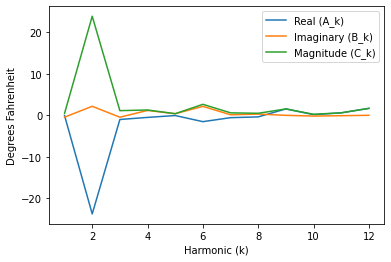

In [292]:
## Use FFT to compute H_k and plot resulting 
Hk = np.fft.rfft(y,n)/(n/2)
# Plot each componenent and magnitude
plt.plot(np.arange(1,Hk.shape[0]),Hk.real[1:(int(n/2)+1)],label='Real (A_k)')
plt.plot(np.arange(1,Hk.shape[0]),Hk.imag[1:(int(n/2)+1)],label='Imaginary (B_k)')
plt.plot(np.arange(1,Hk.shape[0]),abs(Hk[1:int(n/2)+1]),label='Magnitude (C_k)')
plt.xlabel('Harmonic (k)');plt.ylabel('Degrees Fahrenheit');plt.legend()

##  Periodogram


The contribution of a single harmonic to the total variance is given by the common $R^2$ statistic such that

$$ R_k^2  = \frac{(n/2) C_k^2}{(n-1)s_y}.$$

A neat property of the fourier transform is that the information provided by each harmonic is independent. This means the the variances add together linearly therefore the $R^2$ value for any sum of harmonics is simply

$$ R^2  = \sum R_k^2 $$

which is exactly 1 if all harmonics from $k=1$ to $k=n/2$ are considered. This means $R_k^2$ represents a normalised contribution of each harmonic to the variance and it's graph is called the periodogram.

Text(0.5, 0, 'Period, $\tau_k$ (months)')

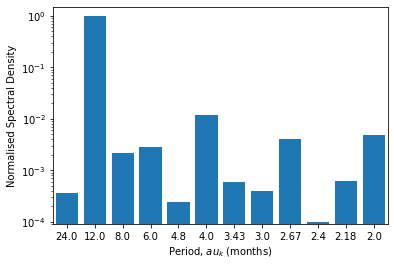

In [293]:
# Calculate variance
sy2 = y.var()
# Magnitude of kth harmonic
C_k = abs(Hk[1:(int(n/2)+1)])
# Plot 'bar graph'
plt.bar(np.arange(1,int(n/2)+1),(n*C_k**2/(2*(n-1)*sy)))
plt.yscale('log')
plt.xticks(np.arange(1,(int(n/2)+1)),np.round(n/np.arange(1,(int(n/2)+1)),2))
plt.axis([0.5,12.5,0.00009,1.5])
plt.ylabel('Normalised Spectral Density')
plt.xlabel('Period, $\tau_k$ (months)')


## Applications

There are numerous applications of frequency domain analysis in environmental data science.

With frequency domain analysis one can isolate at what time scales variability is occuring and therefore identify physical processes. We will discuss sea level (tide) data in the lab session for example. 

Frequency domain analysis allows for the filtering of high or low frequency variability via an inverse foureir transform. Here the foureir transform is carried out to compute $H_k$ for all $k$, then specific harmonics are removed (for example all $H_k$ for for k above some number) and a filtered time series is computed from the remaining harmonics alone.







## Aliasing

What do you think is happening in this [video](https://www.youtube.com/watch?v=TX4U9QRbviA)?

![BirdAlias.png](https://raw.githubusercontent.com/janzika/MATH5271/main/Lecture%204/BirdAlias.png)



## Aliasing

If there is an underlying signal with a frequency $f$ but we make observations at a frequency less than $f$ we may see apparent signals at other frequencies.

Consider a process with a frequency $f$ = 4/5s$^{-1}$ (i.e. period 5/4s). If we measure this process every 5/4 seconds (i.e. with a frequency of 4/5s$^{-1}$) the process will appear constant (like the birds wings). 

If we observe the system every second we will see an apparent cycle with period 5. 

Text(0, 0.5, 'Amplitude')

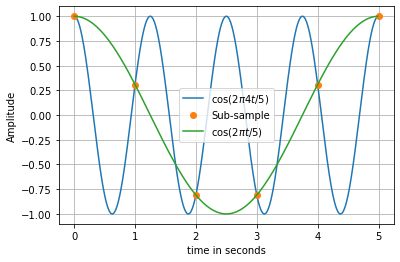

In [294]:
# Demonstrate Aliasing
n = 5 #length of data set in seconds
t = np.arange(0,n,0.01) #time dimension 
t_obs = np.arange(0,6,1) #time of observations
# Use numpy to define cosine and sine
cosfnc = np.cos(2*np.pi*t*4/n)
cosfnc_subsample = np.cos(2*np.pi*t_obs*4/n)
cosfnc_aliased = np.cos(2*np.pi*t/n)
plt.plot(t,cosfnc,label ='$\cos(2\pi 4t/5)$')
plt.plot(t_obs,cosfnc_subsample,'o',label ='Sub-sample')
plt.plot(t,cosfnc_aliased,label ='$\cos(2\pi t/5)$')
plt.grid(); plt.legend()
plt.xlabel('time in seconds');plt.ylabel('Amplitude')

## Nyquist Frequency

The above effect is called aliasing. All the variance is preserved in the fourier transformation. So 'power' in the unsampled higher frequencies will shift to the lower frequencies which are sampled, even if nothing is 'happening' at those frequencies. 

As you will have seen, we only consider frequencies up to 1/2 (i.e. cycles which repeat every 2 time increments). Effectively we need at least two measurments per cycle to determine the two coefficients $A_k$ and $B_k$. This is known as the Nyquist frequency. 

## Nyquist  and Aliasing

Any signal which has a higher frequency than Nyquist ($f>\frac{1}{2}$) will move to an aliased frequency ($f_A$) according to the following formula

$$f_A = j \pm f$$

where $j$ is some integer (positive or nagative). Note here that the unit of time is the time between observations. 

So, if measurements are made every second (1Hz), a process that oscillates less frequently than once per 2 seconds will appear in the periodogram as a process with a lower frequency of $j^+ - f$ where $j^+$ is a positive integer or $f - j^-$ where $j^-$ is a negative integer.

Text(0.5, 0, 'Frequency f (e.g. in s$^{-1}$)')

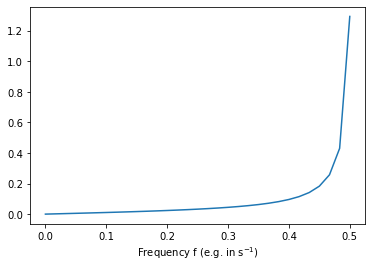

In [301]:
n = 60 #length of data set (e.g. in seconds)
t_obs = np.arange(0,n,1) #time of observations
f=150/n # Aliased if bigger than 1/2 (e.g. once every 2 sec)
cosfnc_subsample = np.cos(2*np.pi*t_obs*f)
Hk = np.fft.rfft(cosfnc_subsample,n+1)/(n/2)
C_k = abs(Hk[0:(int(n/2)+1)])
plt.plot(np.arange(0,int(n/2)+1)/n,C_k)
plt.xlabel('Frequency f (e.g. in s$^{-1}$)')

### Aliasing can lead to very troublesome interpretations of sparse observations.
![DayAftTom.png](https://github.com/janzika/MATH5271/raw/main/Lecture%204/DayAftTom.png)


### A number of extensions to harmonic analysis exist for example 'Wavelets' which quantify changes in harmonics with time.

<div>
<img src=https://github.com/janzika/MATH5271/raw/main/Lecture%204/BirdWavelets.png width="500"/>
</div>

doi.org/10.1371/journal.pone.0146790

# Summary

- Frequency domain analysis is a convenient and elegant way of describing time-series data; 
- Data can be represented in terms of contributions from different frequencies (harmonics);
- Care should be taken in interpreting periodograms since signals above the Nyquist frequency will be aliased to other frequencies in the periodogram.